In [205]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier


%matplotlib inline

In [206]:
SEED = 753951
np.random.seed(SEED)
random.seed(SEED)

In [207]:
df = pd.read_csv("data_cancer.csv")
X = df.drop(["diagnosis", "id"], axis=1) 
Y = df["diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [209]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train, Y_train)
y_pred1 = clf1.predict(X_test)
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           B       0.97      0.90      0.93       117
           M       0.81      0.94      0.87        54

    accuracy                           0.91       171
   macro avg       0.89      0.92      0.90       171
weighted avg       0.92      0.91      0.91       171



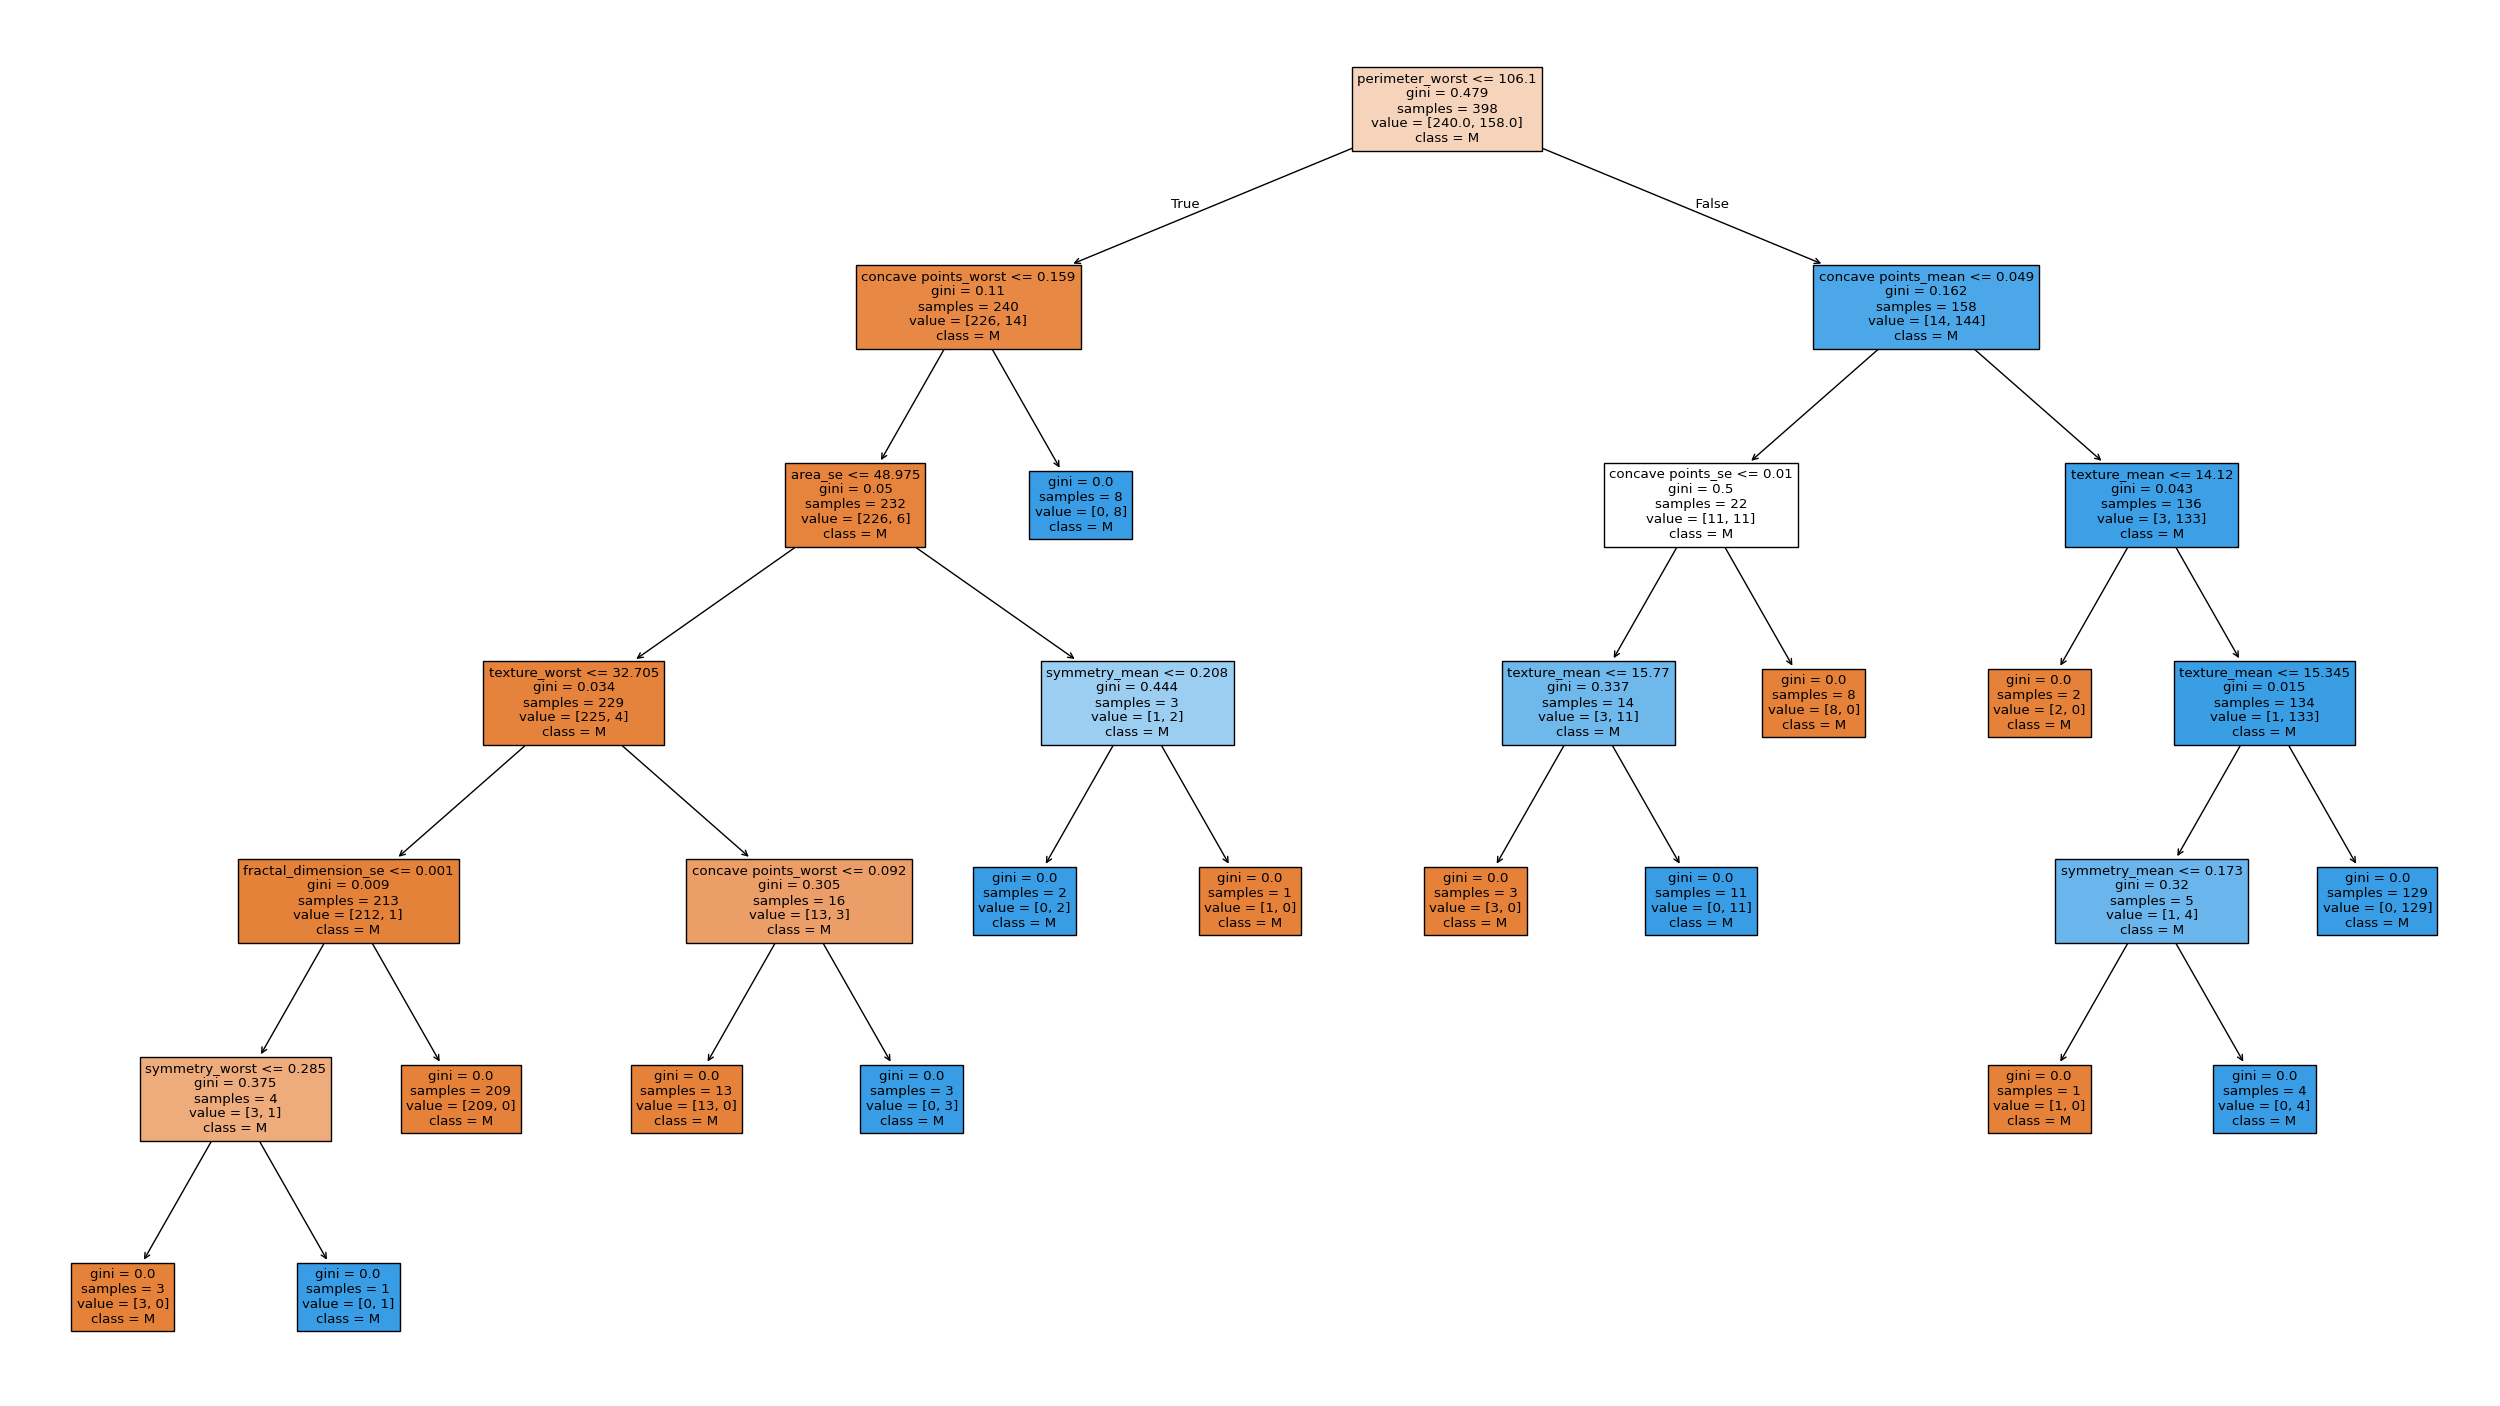

In [210]:
plt.figure(figsize=(32, 18))
plot_tree(clf1, class_names=Y.values, feature_names=X.columns, filled=True);

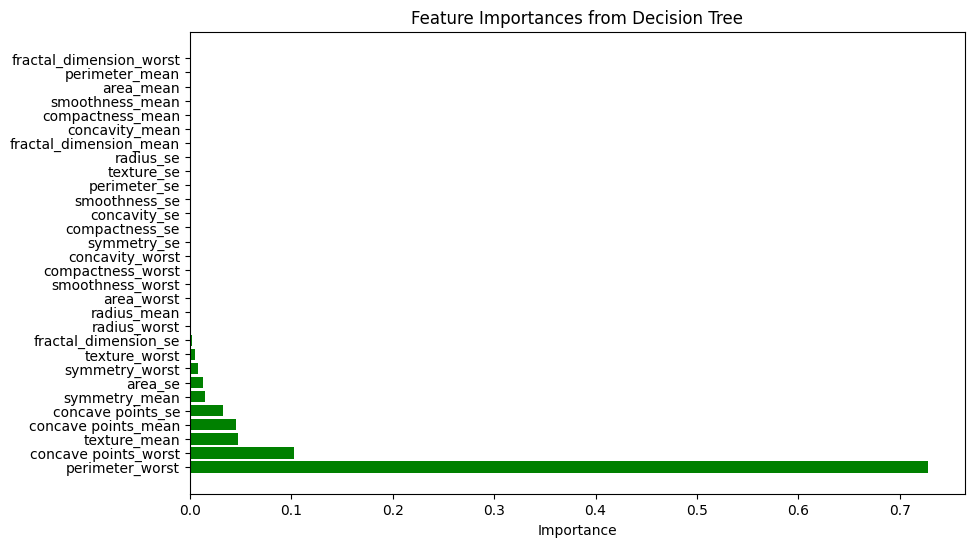

In [211]:
importances = clf1.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="green")
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree')
plt.show()

In [212]:
clf2 = RandomForestClassifier()
clf2 = clf2.fit(X_train, Y_train)
y_pred2 = clf2.predict(X_test)
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           B       0.98      0.97      0.98       117
           M       0.95      0.96      0.95        54

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



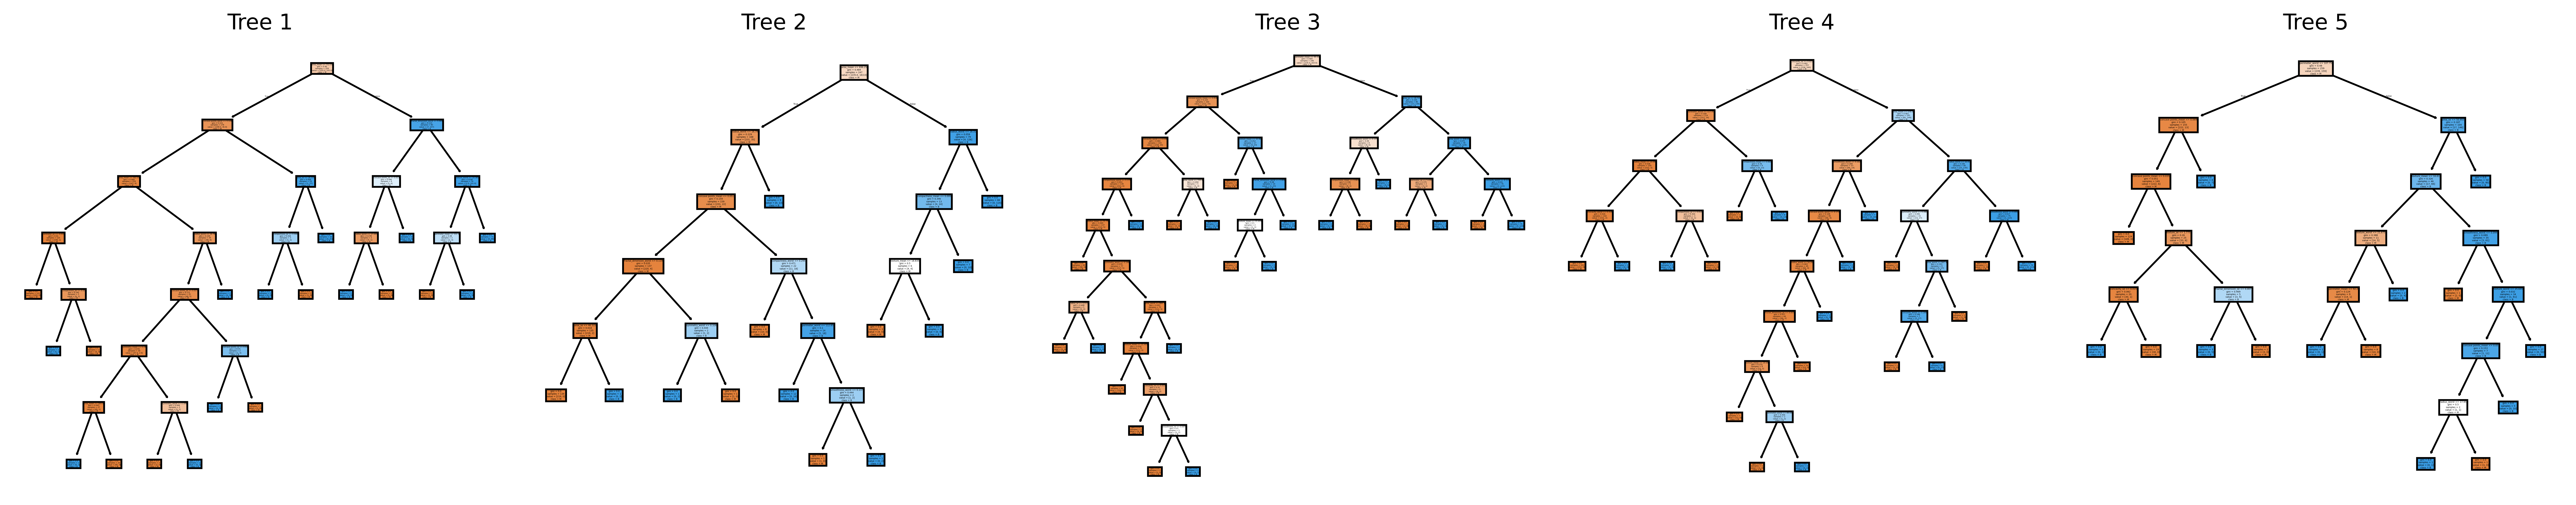

In [213]:
num_trees = 5

random_indices = np.random.choice(range(num_trees), size=num_trees, replace=False)

fig, axes = plt.subplots(nrows=1, ncols=num_trees, figsize=(20, 4), dpi=800)
for i, idx in enumerate(random_indices):
    plot_tree(clf2.estimators_[idx],
              feature_names=X.columns,
              class_names=Y.unique(),
              filled=True,
              ax=axes[i])
    axes[i].set_title(f'Tree {i+1}')

plt.tight_layout()
plt.show()

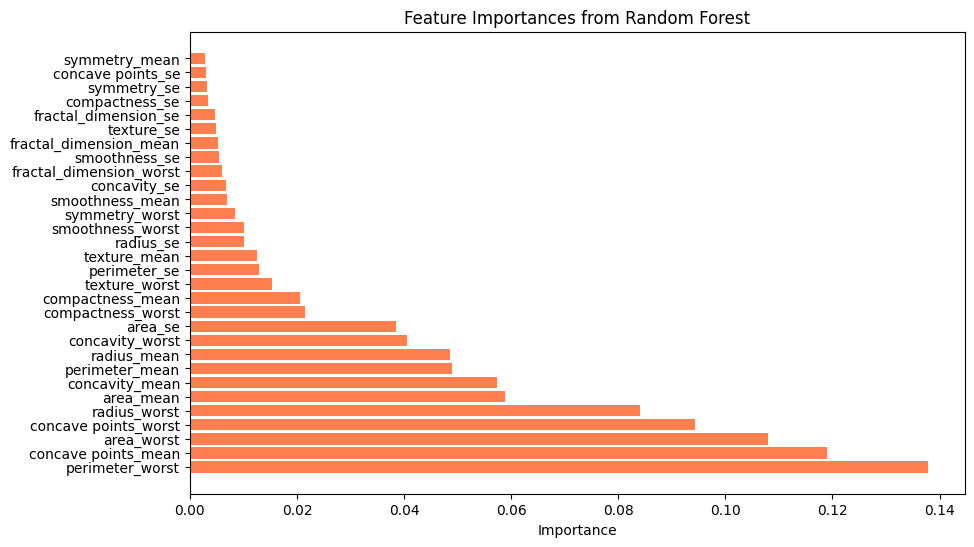

In [214]:
importances2 = clf2.feature_importances_
importance_df2 = pd.DataFrame({'Feature': X.columns, 'Importance': importances2})
importance_df2 = importance_df2.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df2['Feature'], importance_df2['Importance'], color="coral")
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()